<a href="https://colab.research.google.com/github/jinnic/ada-project1/blob/main/Data_Cleaning_for_Wage_pridiction_using_PERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -U scikit-learn==1.4

In [53]:
# Replace your current Google Drive mounting code with this
github_data_url = 'https://raw.githubusercontent.com/jinnic/ada-project1/main/PERM_FY2024_Wage.csv'

# Read the CSV file directly from the GitHub URL
df = pd.read_csv(github_data_url)

df.head()

display(df.head())

,OCCUPATION_TYPE,EMP_FEIN,EMP_NAICS,EMP_NUM_PAYROLL,EMP_YEAR_COMMENCED,JOB_TITLE,JOB_OPP_WAGE_FROM,JOB_OPP_WAGE_TO,JOB_OPP_WAGE_PER,JOB_AVG_WAGE,PRIMARY_WORKSITE_TYPE,PRIMARY_WORKSITE_CITY,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_POSTAL_CODE,PRIMARY_WORKSITE_BLS_AREA,OTHER_REQ_IS_FULLTIME_EMP,OTHER_REQ_IS_LIVEIN_HOUSEHOLD,OTHER_REQ_JOB_FOREIGN_LANGUAGE
0,Non-professional,47-1113427,721110,10.0,2014,Digital Marketing Coordinator,"$39,416.00","$39,416.00",Year,NaN,Business Premises,HONOLULU,HI,96815,"Urban Honolulu, HI",Y,N,N
1,Professional occupation,41-2150645,541511,33.0,2006,Systems Analyst,"$84,781.00",NaN,Year,"$84,781.00",Business Premises,Suwanee,GA,30024,"Atlanta-Sandy Springs-Roswell, GA",Y,N,N
2,Professional occupation,31-1260729,561422,20000.0,1988,Software Engineer,"$100,526.00","$100,526.00",Year,"$100,526.00",Business Premises,Cincinnati,OH,45202,"Cincinnati, OH-KY-IN",Y,N,N
3,Non-professional,22-2551637,48411,15.0,1986,Driver - Tractor Trailer,"$58,490.00","$58,490.00",Year,NaN,Business Premises,Bound Brook,NJ,08805,"New York-Newark-Jersey City, NY-NJ-PA",Y,N,N
4,Professional occupation,81-2885361,541110,20.0,2006,Associate Attorney,"$105,000.00","$110,000.00",Year,"$107,500.00",Business Premises,New York,NY,10016,"New York-Newark-Jersey City, NY-NJ-PA",Y,N,N


# Step 1 & Step 4:  Cleaning Dataset from PERM [2024 PERM data](https://www.dol.gov/


sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_New_Form_FY2024_Q4.xlsx)

## **Filter out data**

```
'OCCUPATION_TYPE' == 'Professional occupation'
'JOB_OPP_WAGE_PER' == 'Year'
'JOB_AVG_WAGE' is not empty # calculated with 'JOB_OPP_WAGE_FROM' &	'JOB_OPP_WAGE_TO' in googlesheet
'PRIMARY_WORKSITE_TYPE' == 'Business Premises'
'OTHER_REQ_IS_FULLTIME_EMP' == 'Y'
'OTHER_REQ_IS_LIVEIN_HOUSEHOLD' == 'N'
'OTHER_REQ_JOB_FOREIGN_LANGUAGE' == 'N'
```



In [54]:
df_clean = df[
    (df['OCCUPATION_TYPE'] == 'Professional occupation') &
    (df['JOB_OPP_WAGE_PER'] == 'Year') &
    (df['JOB_AVG_WAGE'].notna()) &                      # Ensure the calculated wage is not empty
    (df['PRIMARY_WORKSITE_TYPE'] == 'Business Premises') &
    (df['OTHER_REQ_IS_FULLTIME_EMP'] == 'Y') &
    (df['OTHER_REQ_IS_LIVEIN_HOUSEHOLD'] == 'N') &       # Exclude live-in workers
    (df['OTHER_REQ_JOB_FOREIGN_LANGUAGE'] == 'N')        # Exclude jobs requiring a foreign language
].copy() # Use .copy() to avoid SettingWithCopyWarning

df_clean.dropna()
# Display the result to confirm the filter worked
print(f"Original row count: {len(df)}")
print(f"Clean row count: {len(df_clean)}")
display(df_clean.head())

Original row count: 22292
Clean row count: 12661


,OCCUPATION_TYPE,EMP_FEIN,EMP_NAICS,EMP_NUM_PAYROLL,EMP_YEAR_COMMENCED,JOB_TITLE,JOB_OPP_WAGE_FROM,JOB_OPP_WAGE_TO,JOB_OPP_WAGE_PER,JOB_AVG_WAGE,PRIMARY_WORKSITE_TYPE,PRIMARY_WORKSITE_CITY,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_POSTAL_CODE,PRIMARY_WORKSITE_BLS_AREA,OTHER_REQ_IS_FULLTIME_EMP,OTHER_REQ_IS_LIVEIN_HOUSEHOLD,OTHER_REQ_JOB_FOREIGN_LANGUAGE
1,Professional occupation,41-2150645,541511,33.0,2006,Systems Analyst,"$84,781.00",NaN,Year,"$84,781.00",Business Premises,Suwanee,GA,30024,"Atlanta-Sandy Springs-Roswell, GA",Y,N,N
2,Professional occupation,31-1260729,561422,20000.0,1988,Software Engineer,"$100,526.00","$100,526.00",Year,"$100,526.00",Business Premises,Cincinnati,OH,45202,"Cincinnati, OH-KY-IN",Y,N,N
4,Professional occupation,81-2885361,541110,20.0,2006,Associate Attorney,"$105,000.00","$110,000.00",Year,"$107,500.00",Business Premises,New York,NY,10016,"New York-Newark-Jersey City, NY-NJ-PA",Y,N,N
5,Professional occupation,04-3461392,541519,1380.0,1999,Staff Engineer,"$99,382.00",NaN,Year,"$99,382.00",Business Premises,Westborough,MA,01581,"Worcester, MA-CT",Y,N,N
7,Professional occupation,85-1487303,541110,7.0,1999,Legal Assistant,"$60,000.00",NaN,Year,"$60,000.00",Business Premises,New York,NY,10016,"New York-Newark-Jersey City, NY-NJ-PA",Y,N,N


In [55]:
# Remove '$' and ',' from 'JOB_AVG_WAGE'
df_clean['JOB_AVG_WAGE'] = df_clean['JOB_AVG_WAGE'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Convert 'JOB_AVG_WAGE' to numeric
df_clean['JOB_AVG_WAGE'] = pd.to_numeric(df_clean['JOB_AVG_WAGE'], errors='coerce')

# Verify the data type
print("\nData type of JOB_AVG_WAGE after cleaning and conversion:")
print(df_clean['JOB_AVG_WAGE'].dtype)

display(df_clean.head())


Data type of JOB_AVG_WAGE after cleaning and conversion:
float64


,OCCUPATION_TYPE,EMP_FEIN,EMP_NAICS,EMP_NUM_PAYROLL,EMP_YEAR_COMMENCED,JOB_TITLE,JOB_OPP_WAGE_FROM,JOB_OPP_WAGE_TO,JOB_OPP_WAGE_PER,JOB_AVG_WAGE,PRIMARY_WORKSITE_TYPE,PRIMARY_WORKSITE_CITY,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_POSTAL_CODE,PRIMARY_WORKSITE_BLS_AREA,OTHER_REQ_IS_FULLTIME_EMP,OTHER_REQ_IS_LIVEIN_HOUSEHOLD,OTHER_REQ_JOB_FOREIGN_LANGUAGE
1,Professional occupation,41-2150645,541511,33.0,2006,Systems Analyst,"$84,781.00",NaN,Year,84781.0,Business Premises,Suwanee,GA,30024,"Atlanta-Sandy Springs-Roswell, GA",Y,N,N
2,Professional occupation,31-1260729,561422,20000.0,1988,Software Engineer,"$100,526.00","$100,526.00",Year,100526.0,Business Premises,Cincinnati,OH,45202,"Cincinnati, OH-KY-IN",Y,N,N
4,Professional occupation,81-2885361,541110,20.0,2006,Associate Attorney,"$105,000.00","$110,000.00",Year,107500.0,Business Premises,New York,NY,10016,"New York-Newark-Jersey City, NY-NJ-PA",Y,N,N
5,Professional occupation,04-3461392,541519,1380.0,1999,Staff Engineer,"$99,382.00",NaN,Year,99382.0,Business Premises,Westborough,MA,01581,"Worcester, MA-CT",Y,N,N
7,Professional occupation,85-1487303,541110,7.0,1999,Legal Assistant,"$60,000.00",NaN,Year,60000.0,Business Premises,New York,NY,10016,"New York-Newark-Jersey City, NY-NJ-PA",Y,N,N


## **Simplyfy NAICS - North American Industry Classification System**

Keep first two digit for simpler category of industry

In [56]:
# Convert the EMP_NAICS column to a string
# then use string slicing to keep only the first two characters.
df_clean['NAICS_SECTOR'] = df_clean['EMP_NAICS'].astype(str).str[0:2]

# Check the new column and its unique values
print("Unique 2-digit NAICS Sectors:")
print(sorted(df_clean['NAICS_SECTOR'].unique()))

display(df_clean[['EMP_NAICS', 'NAICS_SECTOR']].head())

Unique 2-digit NAICS Sectors:
['11', '21', '22', '23', '31', '32', '33', '42', '44', '45', '48', '49', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81', '92']


,EMP_NAICS,NAICS_SECTOR
1,541511,54
2,561422,56
4,541110,54
5,541519,54
7,541110,54


## **Company Size & Tenure**
Define the boundaries for company size categories and calculate the age of the company based on the year the dataset was published (Fiscal Year 2024)
### **Thresholds common in business/economic:**

* Small: < 50 employees
* Mid: 50 to 1,000 employees
* Large: > 1,000 employees



```
bins = [0, 50, 1000, np.inf]
labels = ['Small', 'Mid', 'Large']
```



In [57]:
bins = [0, 50, 1000, np.inf]
labels = ['Small', 'Mid', 'Large']

df_clean['COMPANY_SIZE_CAT'] = pd.cut(
    df_clean['EMP_NUM_PAYROLL'],
    bins=bins,
    labels=labels,
    right=False, # Use [) intervals (inclusive start, exclusive end)
    duplicates='drop' # Handle any potential bin errors gracefully
)

print("\nCompany Size Distribution:")
print(df_clean['COMPANY_SIZE_CAT'].value_counts(dropna=False))


Company Size Distribution:
COMPANY_SIZE_CAT
Large    5105
Mid      4588
Small    2968
Name: count, dtype: int64


In [58]:
##---------------create 'COMPANY_AGE' column
# The dataset is from FY 2024

REFERENCE_YEAR = 2024

# Ensure EMP_YEAR_COMMENCED is treated as an integer (Year)
df_clean['EMP_YEAR_COMMENCED'] = pd.to_numeric(df_clean['EMP_YEAR_COMMENCED'], errors='coerce')
df_clean = df_clean.dropna(subset=['EMP_YEAR_COMMENCED'])

# Calculate company age in years
df_clean['COMPANY_AGE'] = REFERENCE_YEAR - df_clean['EMP_YEAR_COMMENCED']

print("\nCompany Age (Length of Establishment) Statistics:")
print(df_clean['COMPANY_AGE'].describe())

display(df_clean['COMPANY_AGE'])



Company Age (Length of Establishment) Statistics:
count    12661.000000
mean        37.142169
std         40.066231
min          1.000000
25%         12.000000
50%         25.000000
75%         47.000000
max        933.000000
Name: COMPANY_AGE, dtype: float64


,COMPANY_AGE
1,18
2,36
4,18
5,25
7,25
...,...
22286,16
22288,10
22289,31
22290,28


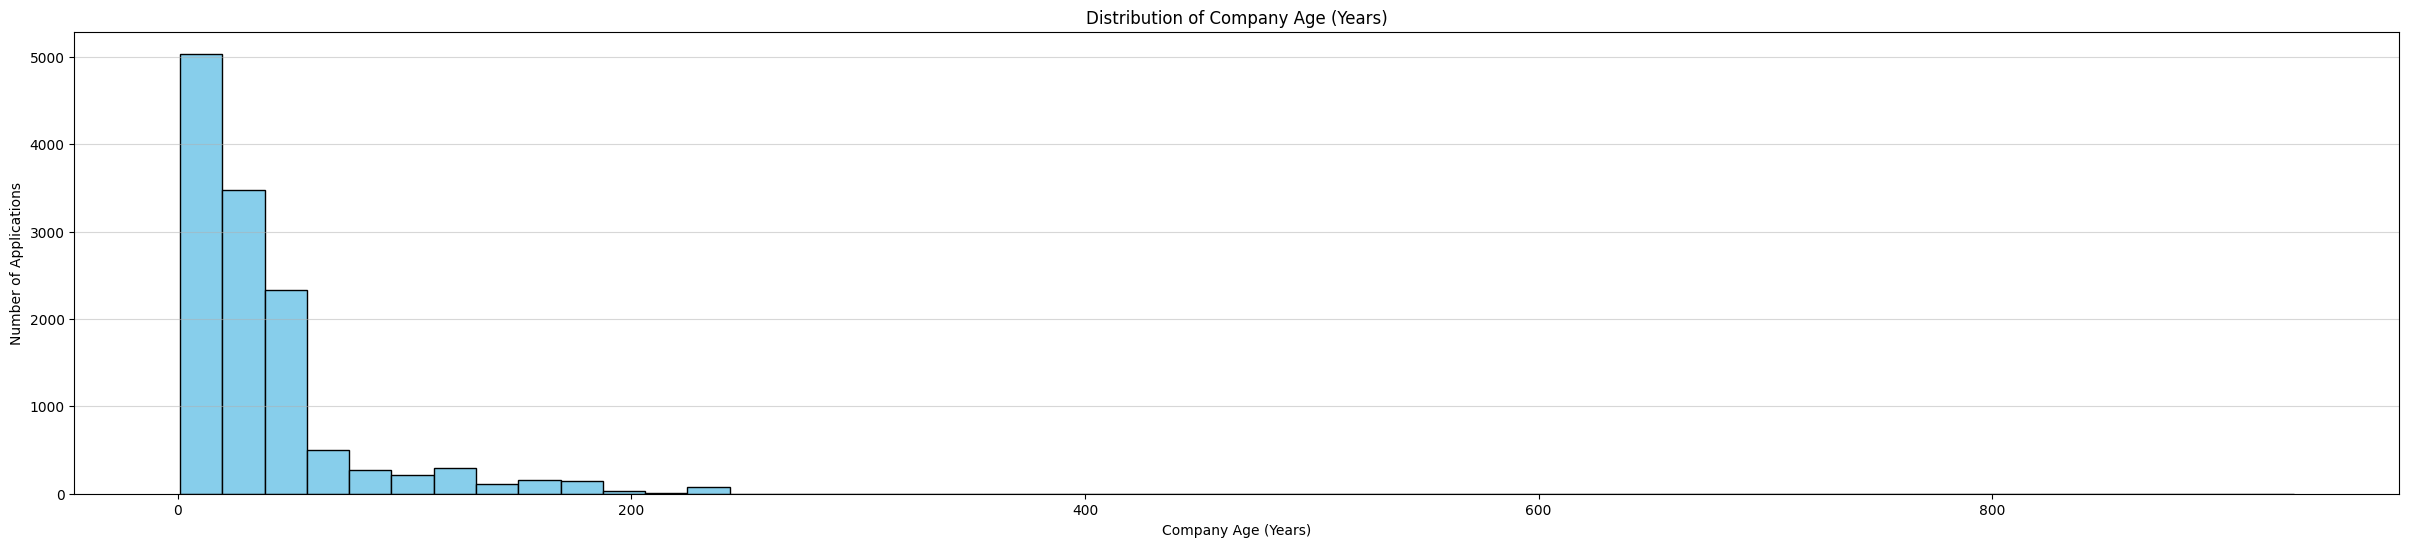

In [59]:
import matplotlib.pyplot as plt

# 1. Set the size of the plot
plt.figure(figsize=(30, 6))

# 2. Create the histogram
plt.hist(df_clean['COMPANY_AGE'], bins=50, edgecolor='black', color='skyblue')

# 3. Add labels and a title for clarity
plt.title('Distribution of Company Age (Years)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Applications')
plt.grid(axis='y', alpha=0.5)

# 4. Show the plot
plt.show()

## **Thresholds for company age based on distribution:**

* Young: < 10 years old
* Established: 10 to 25 years old
* Mature: 25 to 45 years old
* Legacy: > 45 years old



```
bins = [0, 10, 25, 45, np.inf]
labels = ['Young', 'Established', 'Mature', 'Legacy']
```


In [60]:
bins = [0, 10, 25, 45, np.inf]
labels = ['Young', 'Established', 'Mature', 'Legacy']

# Create the new categorical column
df_clean['COMPANY_AGE_CAT'] = pd.cut(
    df_clean['COMPANY_AGE'],
    bins=bins,
    labels=labels,
    right=False,  # Use [) intervals: inclusive start, exclusive end
    duplicates='drop'
)

# Display the new distribution
print("\nCompany Age Category Distribution (Custom Bins):")
print(df_clean['COMPANY_AGE_CAT'].value_counts())


Company Age Category Distribution (Custom Bins):
COMPANY_AGE_CAT
Established    4157
Legacy         3622
Mature         2769
Young          2113
Name: count, dtype: int64


## Drop Irrelevent columns and create df_final

In [61]:

# --- Drop Irrelevant and Redundant Columns ---
columns_to_drop = [
    # Redundant or Replaced
    'EMP_FEIN',                           # Decided to remove
    'EMP_NAICS',                          # Replaced by NAICS_SECTOR
    # 'EMP_NUM_PAYROLL',                    # Replaced by COMPANY_SIZE_CAT
    'EMP_YEAR_COMMENCED',                  # Replaced by COMPANY_AGE_CAT
    # 'COMPANY_AGE',                         # Replaced by COMPANY_AGE_CAT
    'JOB_OPP_WAGE_FROM',                  # Replaced by JOB_AVG_WAGE
    'JOB_OPP_WAGE_TO',                    # Replaced by JOB_AVG_WAGE
    'PRIMARY_WORKSITE_CITY',              # Will only keep BLS_AREA for simplicity
    'PRIMARY_WORKSITE_POSTAL_CODE',


    # Used to Filtered
    'OCCUPATION_TYPE',
    'JOB_OPP_WAGE_PER',
    'PRIMARY_WORKSITE_TYPE',
    'OTHER_REQ_IS_FULLTIME_EMP',
    'OTHER_REQ_IS_LIVEIN_HOUSEHOLD',
    'OTHER_REQ_JOB_FOREIGN_LANGUAGE'
]
df_final = df_clean.copy()
df_final = df_final.drop(columns=columns_to_drop)

print("\nColumns dropped successfully.")
print(f"Clean row count: {len(df_clean)}")
print(f"Final row count: {len(df_final)}")

display(df_final.head())
print("Missing values (NA count) per column:")
print(df_final.isna().sum())


Columns dropped successfully.
Clean row count: 12661
Final row count: 12661


,EMP_NUM_PAYROLL,JOB_TITLE,JOB_AVG_WAGE,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_BLS_AREA,NAICS_SECTOR,COMPANY_SIZE_CAT,COMPANY_AGE,COMPANY_AGE_CAT
1,33.0,Systems Analyst,84781.0,GA,"Atlanta-Sandy Springs-Roswell, GA",54,Small,18,Established
2,20000.0,Software Engineer,100526.0,OH,"Cincinnati, OH-KY-IN",56,Large,36,Mature
4,20.0,Associate Attorney,107500.0,NY,"New York-Newark-Jersey City, NY-NJ-PA",54,Small,18,Established
5,1380.0,Staff Engineer,99382.0,MA,"Worcester, MA-CT",54,Large,25,Mature
7,7.0,Legal Assistant,60000.0,NY,"New York-Newark-Jersey City, NY-NJ-PA",54,Small,25,Mature


Missing values (NA count) per column:
EMP_NUM_PAYROLL              0
JOB_TITLE                    0
JOB_AVG_WAGE                 0
PRIMARY_WORKSITE_STATE       0
PRIMARY_WORKSITE_BLS_AREA    0
NAICS_SECTOR                 0
COMPANY_SIZE_CAT             0
COMPANY_AGE                  0
COMPANY_AGE_CAT              0
dtype: int64


## **Clean Job Title based on graph**



In [62]:
# Convert to lowercase and remove leading/trailing spaces
df_final['JOB_TITLE_CLEAN'] = df_final['JOB_TITLE'].str.lower().str.strip()

# remove common seniority prefixes/suffixes and numbers from title
df_final['JOB_TITLE_CLEAN'] = (
    df_final['JOB_TITLE_CLEAN']
    .str.replace(r'\b(sr|staff|multiple openings|principal|senior|jr|junior|lead|i|ii|iii)\b', '', regex=True)
    .str.replace(r'\d+', '', regex=True) # Remove numbers
    .str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation (e.g., commas, dashes)
    .str.replace(r'\s+', ' ', regex=True)     # Collapse multiple spaces into one
    .str.strip()
)

# replace 'software development engineer' with 'software engineer'
df_final['JOB_TITLE_CLEAN'] = df_final['JOB_TITLE_CLEAN'].str.replace(
    'software development engineer',
    'software engineer',
    regex=True
)

# replace 'software developer' with 'software engineer'
df_final['JOB_TITLE_CLEAN'] = df_final['JOB_TITLE_CLEAN'].str.replace(
    'software developer',
    'software engineer',
    regex=True
)

# replace 'software programmer' with 'software engineer'
df_final['JOB_TITLE_CLEAN'] = df_final['JOB_TITLE_CLEAN'].str.replace(
    'software programmer',
    'software engineer',
    regex=True
)

print(f"Unique Titles before cleaning: {df_final['JOB_TITLE'].nunique()}")
print(f"Unique Titles after cleaning: {df_final['JOB_TITLE_CLEAN'].nunique()}")

Unique Titles before cleaning: 6176
Unique Titles after cleaning: 4595


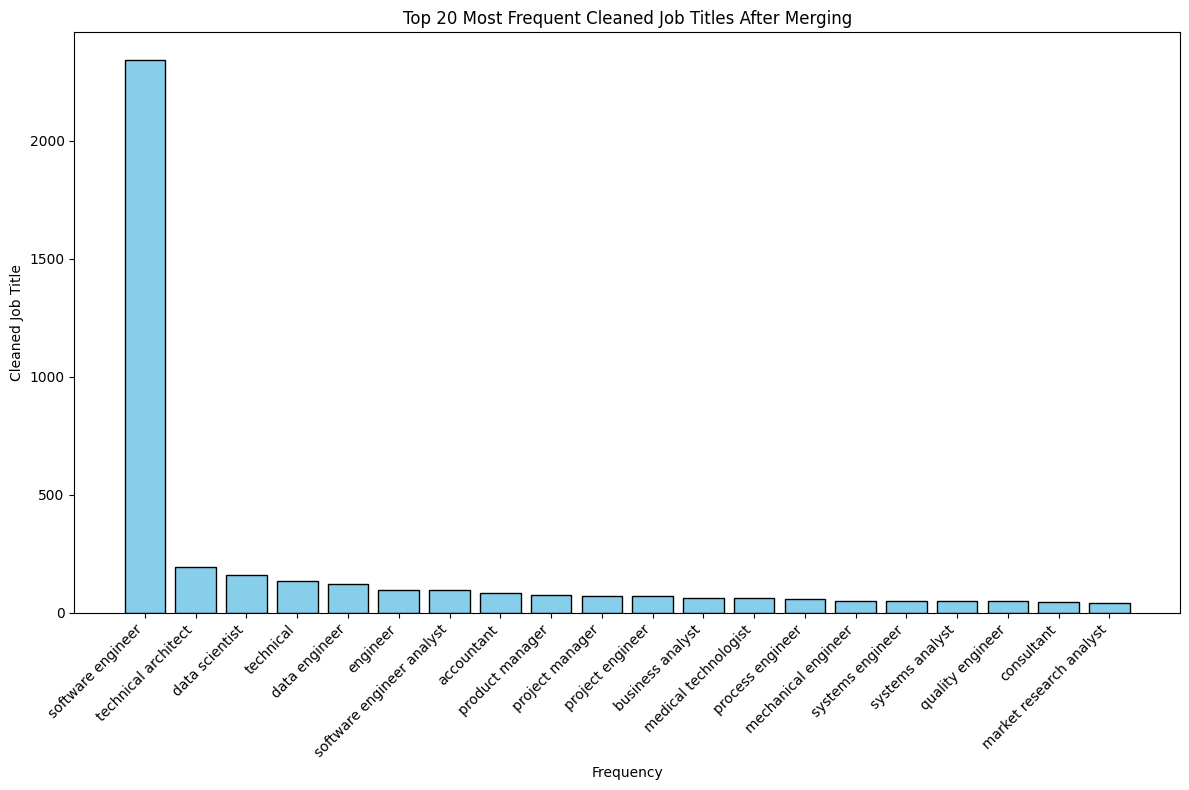

In [63]:
# Get the top 20 most frequent cleaned job titles
top_n = 20  # You can adjust this number
top_job_titles = df_final['JOB_TITLE_CLEAN'].value_counts().nlargest(top_n)

# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(top_job_titles.index, top_job_titles.values, edgecolor='black', color='skyblue')
plt.title(f'Top {top_n} Most Frequent Cleaned Job Titles After Merging')
plt.xlabel('Frequency')
plt.ylabel('Cleaned Job Title')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout()
plt.show()

## **Simplify JOB_TITLE by grouping titles that appears less then 50 times**


In [64]:
#----- Simplify JOB_TITLE (Your core Job Feature) ---
TITLE_THRESHOLD = 50  # Group titles that appear < 50 times
title_counts = df_final['JOB_TITLE_CLEAN'].value_counts()
rare_titles = title_counts[title_counts < TITLE_THRESHOLD].index
df_final['JOB_TITLE_FINAL'] = df_final['JOB_TITLE_CLEAN'].replace(rare_titles, 'Other Job Title')
#df_final = df_final.drop(columns=['JOB_TITLE'])
print(f"Final Job Title categories: {df_final['JOB_TITLE_FINAL'].nunique()}")


Final Job Title categories: 19


## **Simplify Simplify PRIMARY_WORKSITE_BLS_AREA by grouping ares that is less then 10 times**


In [65]:
# --- Simplify PRIMARY_WORKSITE_BLS_AREA (Your core Location Feature) ---
BLS_THRESHOLD = 50 # Group areas that appear < 50 times
bls_counts = df_final['PRIMARY_WORKSITE_BLS_AREA'].value_counts()
rare_bls = bls_counts[bls_counts < BLS_THRESHOLD].index
df_final['BLS_AREA_FINAL'] = df_final['PRIMARY_WORKSITE_BLS_AREA'].replace(rare_bls, 'Other BLS Area')
#df_final = df_final.drop(columns=['PRIMARY_WORKSITE_BLS_AREA'])
print(f"Final BLS Area categories: {df_final['BLS_AREA_FINAL'].nunique()}")
print(f"Final row count: {len(df_final)}")


Final BLS Area categories: 34
Final row count: 12661


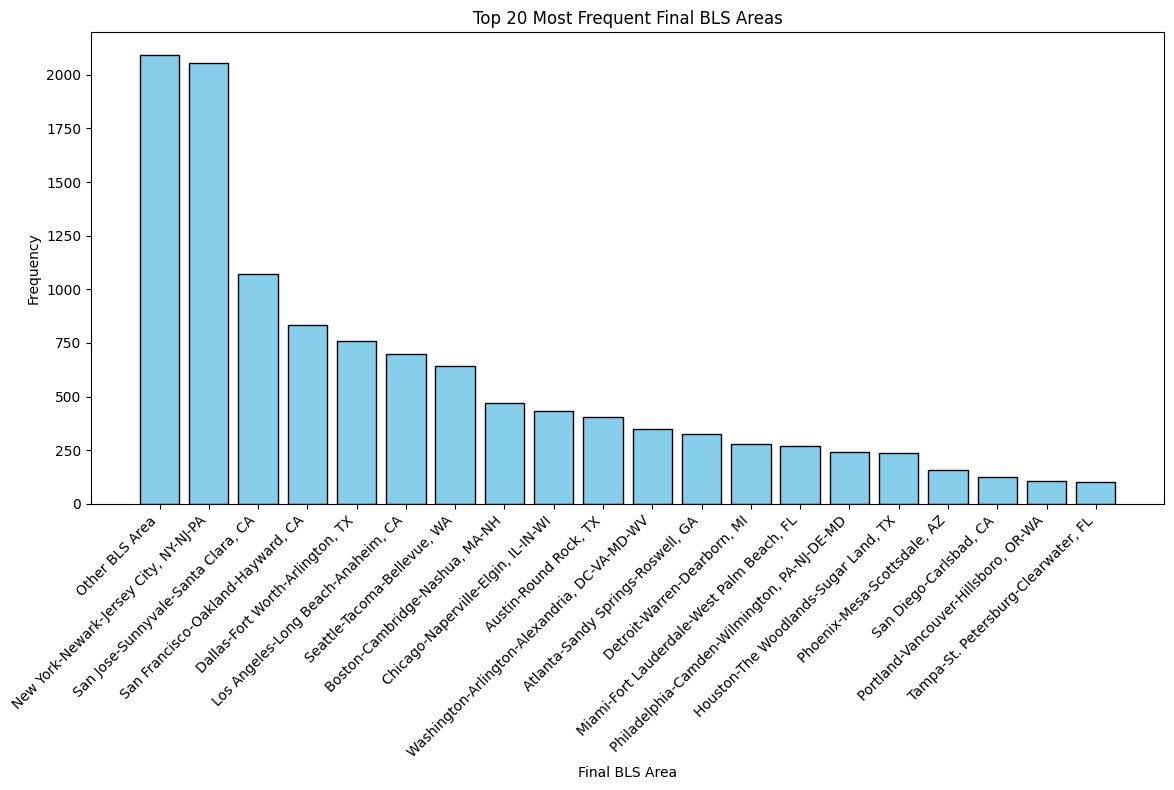

In [66]:
# Get the top 20 most frequent final BLS areas
top_n = 20
top_bls_areas = df_final['BLS_AREA_FINAL'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
plt.bar(top_bls_areas.index, top_bls_areas.values, edgecolor='black', color='skyblue')
plt.title(f'Top {top_n} Most Frequent Final BLS Areas')
plt.xlabel('Final BLS Area')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
display(df_final.head())


,EMP_NUM_PAYROLL,JOB_TITLE,JOB_AVG_WAGE,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_BLS_AREA,NAICS_SECTOR,COMPANY_SIZE_CAT,COMPANY_AGE,COMPANY_AGE_CAT,JOB_TITLE_CLEAN,JOB_TITLE_FINAL,BLS_AREA_FINAL
1,33.0,Systems Analyst,84781.0,GA,"Atlanta-Sandy Springs-Roswell, GA",54,Small,18,Established,systems analyst,systems analyst,"Atlanta-Sandy Springs-Roswell, GA"
2,20000.0,Software Engineer,100526.0,OH,"Cincinnati, OH-KY-IN",56,Large,36,Mature,software engineer,software engineer,Other BLS Area
4,20.0,Associate Attorney,107500.0,NY,"New York-Newark-Jersey City, NY-NJ-PA",54,Small,18,Established,associate attorney,Other Job Title,"New York-Newark-Jersey City, NY-NJ-PA"
5,1380.0,Staff Engineer,99382.0,MA,"Worcester, MA-CT",54,Large,25,Mature,engineer,engineer,"Worcester, MA-CT"
7,7.0,Legal Assistant,60000.0,NY,"New York-Newark-Jersey City, NY-NJ-PA",54,Small,25,Mature,legal assistant,Other Job Title,"New York-Newark-Jersey City, NY-NJ-PA"


In [68]:
# --- Drop Columns that are not needed---
columns_to_drop = [
    'JOB_TITLE',
    'JOB_TITLE_CLEAN',
    'PRIMARY_WORKSITE_BLS_AREA'
]

df_final = df_final.drop(columns=columns_to_drop)

print(f"Final row count: {len(df_final)}")
print("Missing values (NA count) per column:")
print(df_final.isna().sum())
display(df_final.head())


Final row count: 12661
Missing values (NA count) per column:
EMP_NUM_PAYROLL           0
JOB_AVG_WAGE              0
PRIMARY_WORKSITE_STATE    0
NAICS_SECTOR              0
COMPANY_SIZE_CAT          0
COMPANY_AGE               0
COMPANY_AGE_CAT           0
JOB_TITLE_FINAL           0
BLS_AREA_FINAL            0
dtype: int64


,EMP_NUM_PAYROLL,JOB_AVG_WAGE,PRIMARY_WORKSITE_STATE,NAICS_SECTOR,COMPANY_SIZE_CAT,COMPANY_AGE,COMPANY_AGE_CAT,JOB_TITLE_FINAL,BLS_AREA_FINAL
1,33.0,84781.0,GA,54,Small,18,Established,systems analyst,"Atlanta-Sandy Springs-Roswell, GA"
2,20000.0,100526.0,OH,56,Large,36,Mature,software engineer,Other BLS Area
4,20.0,107500.0,NY,54,Small,18,Established,Other Job Title,"New York-Newark-Jersey City, NY-NJ-PA"
5,1380.0,99382.0,MA,54,Large,25,Mature,engineer,"Worcester, MA-CT"
7,7.0,60000.0,NY,54,Small,25,Mature,Other Job Title,"New York-Newark-Jersey City, NY-NJ-PA"



# Step 2: Divide into Training and Testing Sets

In [69]:
from sklearn.model_selection import train_test_split

# 1. Define the final X (Features) and Y (Target)
Y = df_final['JOB_AVG_WAGE']
X = df_final.drop(columns=['JOB_AVG_WAGE'])

# 2. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2, # 20% for testing
    random_state=42 # Ensures reproducible
)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (10128, 8), X_test shape: (2533, 8)
y_train shape: (10128,), y_test shape: (2533,)


# **Step 3: Explore your training set**

In [70]:
# Show the data type of the training features
print("Training Features (X_train) Information:")
X_train.info()

# Show the summary of the target variable (wage)
print("\nTarget (y_train) Summary:")
print(y_train.describe())

Training Features (X_train) Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10128 entries, 2163 to 13037
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   EMP_NUM_PAYROLL         10128 non-null  float64 
 1   PRIMARY_WORKSITE_STATE  10128 non-null  object  
 2   NAICS_SECTOR            10128 non-null  object  
 3   COMPANY_SIZE_CAT        10128 non-null  category
 4   COMPANY_AGE             10128 non-null  int64   
 5   COMPANY_AGE_CAT         10128 non-null  category
 6   JOB_TITLE_FINAL         10128 non-null  object  
 7   BLS_AREA_FINAL          10128 non-null  object  
dtypes: category(2), float64(1), int64(1), object(4)
memory usage: 574.0+ KB

Target (y_train) Summary:
count    1.012800e+04
mean     1.375446e+05
std      6.035025e+04
min      2.414900e+04
25%      9.850000e+04
50%      1.333900e+05
75%      1.680375e+05
max      1.454700e+06
Name: JOB_AVG_WAGE, dtype: float6

In [71]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)


Categorical features:
['PRIMARY_WORKSITE_STATE', 'NAICS_SECTOR', 'COMPANY_SIZE_CAT', 'COMPANY_AGE_CAT', 'JOB_TITLE_FINAL', 'BLS_AREA_FINAL']

Numerical features:
['EMP_NUM_PAYROLL', 'COMPANY_AGE']


# Step 5: Visualize the data in your training set

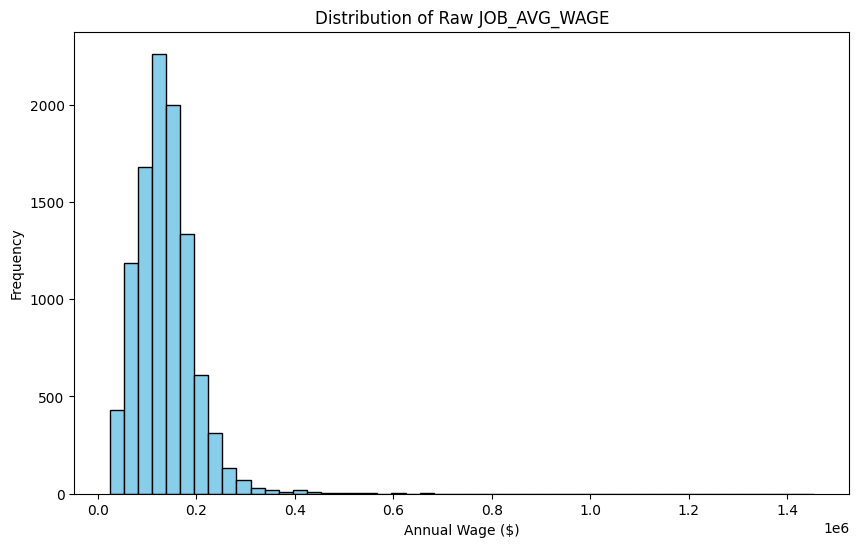

In [72]:
plt.figure(figsize=(10, 6))
# Plot the raw (untransformed) wage data from your training set
plt.hist(y_train, bins=50, edgecolor='black', color='skyblue')

plt.title('Distribution of Raw JOB_AVG_WAGE')
plt.xlabel('Annual Wage ($)')
plt.ylabel('Frequency')
plt.show()

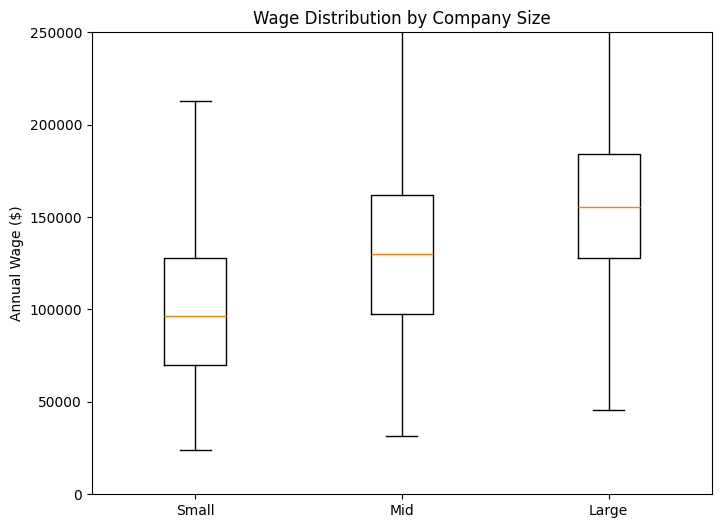

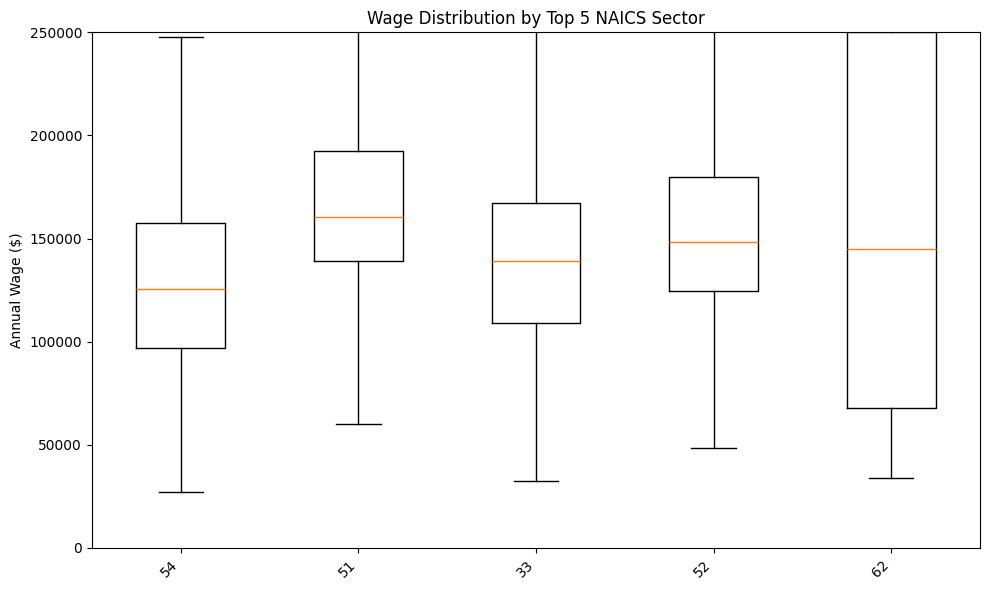

In [73]:
# Create a temporary DataFrame for plotting (using the original un-encoded features)
plot_df = X_train.copy()
plot_df['JOB_AVG_WAGE'] = y_train

# --- Plot 1: Wage by Company Size ---
plt.figure(figsize=(8, 6))
# Group data by COMPANY_SIZE_CAT and extract wage values for each category
company_size_data = [plot_df[plot_df['COMPANY_SIZE_CAT'] == size]['JOB_AVG_WAGE'].values for size in ['Small', 'Mid', 'Large']]
plt.boxplot(company_size_data, tick_labels=['Small', 'Mid', 'Large'], showfliers=False) # Hide outliers for better visualization of the main distribution
plt.title('Wage Distribution by Company Size')
plt.ylabel('Annual Wage ($)')
plt.ylim(0, 250000) # Cap the Y-axis to see detail, hiding extreme outliers
plt.show()

# --- Plot 2: Wage by NAICS Sector (Select the top few sectors for clarity) ---
top_sectors = plot_df['NAICS_SECTOR'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 6))
# Group data by top NAICS_SECTOR and extract wage values
naics_data = [plot_df[plot_df['NAICS_SECTOR'] == sector]['JOB_AVG_WAGE'].values for sector in top_sectors]
plt.boxplot(naics_data, tick_labels=top_sectors, showfliers=False) # Hide outliers
plt.title('Wage Distribution by Top 5 NAICS Sector')
plt.ylabel('Annual Wage ($)')
plt.ylim(0, 250000)
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout()
plt.show()

## Log Transformation of the Target Variable

The histogram of the raw `JOB_AVG_WAGE` (shown in the previous plot) is heavily skewed to the right, with a long tail of high wage values.

* **Fix the Skew**: Most people earn less, but a few earn much more. Applying the log function squishes those high outliers, making the data look more like a standard, symmetrical bell curve.

* **Improve the Model**: Linear regression models work best with bell-curve data. Normalizing the wage makes the predictions more reliable and accurate.


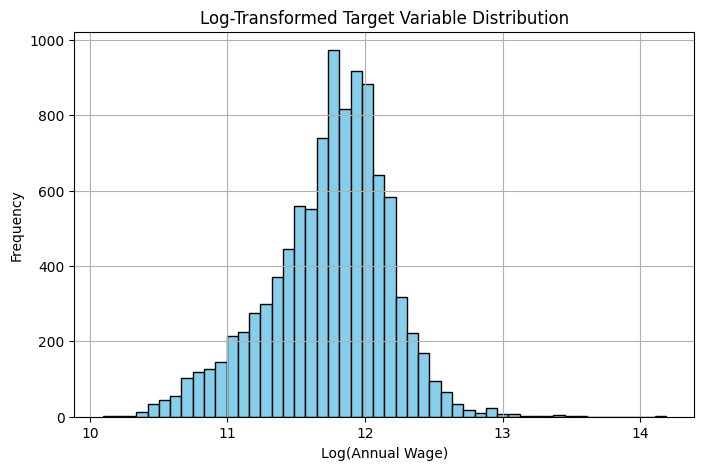

In [85]:
# Apply the natural log transformation to the target variable - less skewed
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Plot the log wage histogram
plt.figure(figsize=(8, 5))
y_train_log.hist(bins=50,edgecolor='black', color='skyblue')
plt.title('Log-Transformed Target Variable Distribution')
plt.xlabel('Log(Annual Wage)')
plt.ylabel('Frequency')
plt.show()

In [76]:
# Show the structure of the training features
print("Training Features (X_train) Information:")
X_train.info()

# Show the statistical summary of the transformed target variable
print("\nLog-Transformed Target (y_train_log) Summary:")
print(y_train_log.describe())

Training Features (X_train) Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10128 entries, 2163 to 13037
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   EMP_NUM_PAYROLL         10128 non-null  float64 
 1   PRIMARY_WORKSITE_STATE  10128 non-null  object  
 2   NAICS_SECTOR            10128 non-null  object  
 3   COMPANY_SIZE_CAT        10128 non-null  category
 4   COMPANY_AGE             10128 non-null  int64   
 5   COMPANY_AGE_CAT         10128 non-null  category
 6   JOB_TITLE_FINAL         10128 non-null  object  
 7   BLS_AREA_FINAL          10128 non-null  object  
dtypes: category(2), float64(1), int64(1), object(4)
memory usage: 574.0+ KB

Log-Transformed Target (y_train_log) Summary:
count    10128.000000
mean        11.741284
std          0.436415
min         10.091998
25%         11.497812
50%         11.801032
75%         12.031942
max         14.190310
Name: JOB_AVG

# Step 6: Apply transformations to your data

## Scatter Matrix of Numerical Features and Log-Transformed Wage

Scatter matrix visualizes the relationships between the numerical features (`EMP_NUM_PAYROLL` - capped at 10,000 for readability, and `COMPANY_AGE`) and the log-transformed target variable (`LOG_WAGE`) in the training set.

*   **Diagonal Plots**: The diagonal plots show the distribution (using a Kernel Density Estimate - KDE) of each variable. This helps to see the shape and spread of the data for each numerical feature and the log-wage.
*   **Off-Diagonal Plots**: The off-diagonal plots are scatter plots showing the pairwise relationships between the variables. These plots help to identify potential correlations or patterns. For example, you can see how `LOG_WAGE` relates to `EMP_NUM_PAYROLL` and `COMPANY_AGE`.

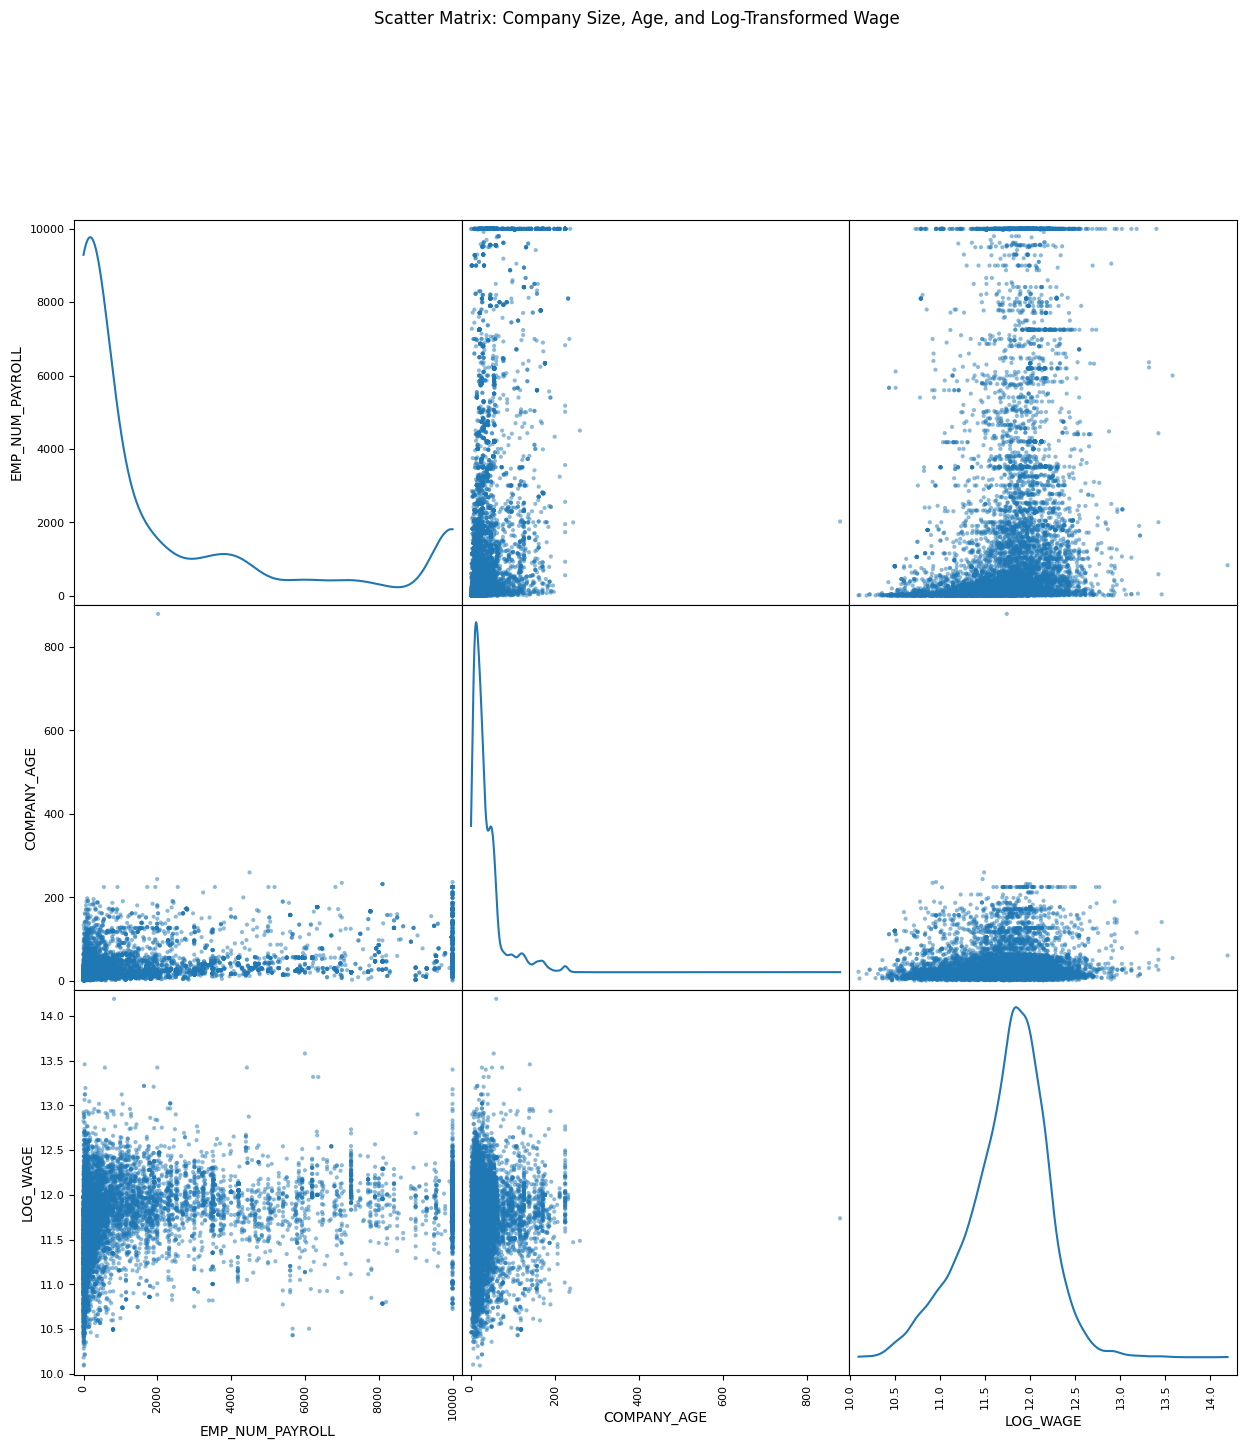

In [104]:
# --- 1. Scatter Plot (Numerical Feature & Target) ---
# Note: Cap EMP_NUM_PAYROLL at 10,000 to reduce the extreme effect of outliers and make the scatter plot more readable.
df_scatter = X_train[['EMP_NUM_PAYROLL', 'COMPANY_AGE']].copy()
df_scatter['EMP_NUM_PAYROLL'] = df_scatter['EMP_NUM_PAYROLL'].clip(upper=10000)
df_scatter['LOG_WAGE'] = y_train_log.values

# Scatter Matrix
# Shows correlations between the two numerical features and the target.
pd.plotting.scatter_matrix(df_scatter, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Matrix: Company Size, Age, and Log-Transformed Wage', y=1.02)
plt.show()

## Log-Wage Distribution by All BLS Areas

Shows the distribution of the log annual wage (`LOG_WAGE`) across all unique BLS Areas in the training set. The areas are sorted from highest to lowest based on their average log-wage.

*   **Boxes**: Represent the middle 50% of log-wage values for each BLS area. The length of the box indicates the spread of wages within that area.
*   **Lines inside Boxes**: Indicate the median log-wage for each area.
*   **Circles**: Represent potential outliers, which are individual data points falling outside the whiskers.


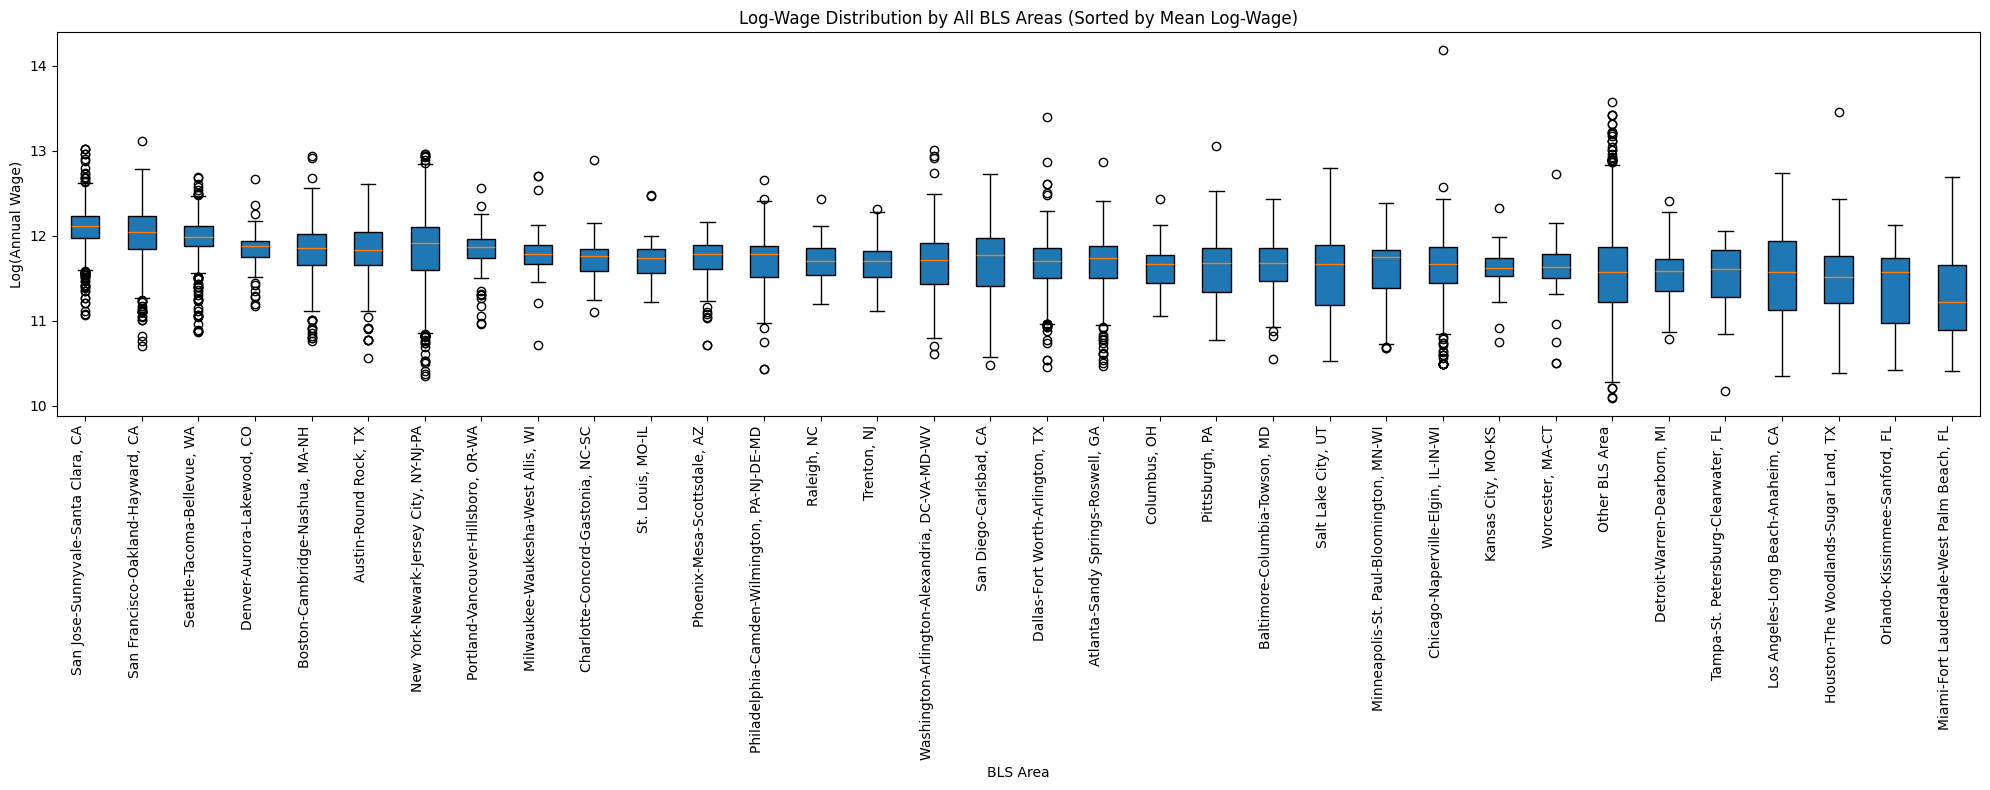

In [98]:
# --- 2. Box Plot (Categorical Feature & Target) ---

# 1. Prepare data for plotting
# Create a copy of the training features and add the log-transformed target variable
plot_df = X_train.copy()
plot_df['LOG_WAGE'] = y_train_log

# Get all unique BLS areas in the training set to ensure we include all categories
all_areas = sorted(plot_df['BLS_AREA_FINAL'].unique())

# Filter the DataFrame to include only the areas we want to plot (in this case, all areas)
plot_df_all = plot_df[plot_df['BLS_AREA_FINAL'].isin(all_areas)]

# Calculate the mean log-wage for each BLS Area and sort the areas
# This determines the order of the box plots from highest to lowest mean log-wage
area_order = plot_df_all.groupby('BLS_AREA_FINAL')['LOG_WAGE'].mean().sort_values(ascending=False).index.tolist()

# Prepare data for matplotlib boxplot: create a list of arrays,
# where each array contains the log-wage values for a specific BLS Area,
# ordered according to the calculated mean log-wage
data_to_plot = [plot_df_all[plot_df_all['BLS_AREA_FINAL'] == area]['LOG_WAGE'].values for area in area_order]

# 2. Use matplotlib's boxplot function to create the plot
plt.figure(figsize=(20, 8)) # Increase figure size for better readability of many categories
plt.boxplot(data_to_plot, tick_labels=area_order, patch_artist=True) # Create boxplots with specified labels and styling

# Add title and axis labels for clarity
plt.title('Log-Wage Distribution by All BLS Areas (Sorted by Mean Log-Wage)')
plt.xlabel('BLS Area')
plt.ylabel('Log(Annual Wage)')

# Rotate the x-axis labels for better readability as there are many categories
plt.xticks(rotation=90, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

 ## Replace each BLS Area with the average log(Wage) observed for that area in the training set. So it can be added to matrix.

In [111]:
# --- Create Proxy for BLS_AREA_FINAL using Target Mean Encoding ---

# 1. Combine X_train and y_train_log for easy calculation
train_df_temp = X_train.copy()
train_df_temp['LOG_WAGE'] = y_train_log

# 2. Calculate the mean LOG_WAGE for each BLS Area category using the training data
bls_means = train_df_temp.groupby('BLS_AREA_FINAL')['LOG_WAGE'].mean()

# 3. Map the mean back to a new numerical column in both X_train and X_test
# This is your new numerical proxy feature. Crucially, we use the means calculated from the training data
X_train['BLS_AREA_PROXY_MEAN'] = X_train['BLS_AREA_FINAL'].map(bls_means)
X_test['BLS_AREA_PROXY_MEAN'] = X_test['BLS_AREA_FINAL'].map(bls_means)


print("New numerical proxy feature created: 'BLS_AREA_PROXY_MEAN'")
print("Added to both X_train and X_test.")
print("\nX_train with new proxy:")
display(X_train[['BLS_AREA_FINAL', 'BLS_AREA_PROXY_MEAN']].head())
print("\nX_test with new proxy:")
display(X_test[['BLS_AREA_FINAL', 'BLS_AREA_PROXY_MEAN']].head())

New numerical proxy feature created: 'BLS_AREA_PROXY_MEAN'
Added to both X_train and X_test.

X_train with new proxy:


,BLS_AREA_FINAL,BLS_AREA_PROXY_MEAN
2163,"San Jose-Sunnyvale-Santa Clara, CA",12.102002
2334,"Atlanta-Sandy Springs-Roswell, GA",11.654482
6372,"Los Angeles-Long Beach-Anaheim, CA",11.532787
7503,"Los Angeles-Long Beach-Anaheim, CA",11.532787
15190,"San Jose-Sunnyvale-Santa Clara, CA",12.102002



X_test with new proxy:


,BLS_AREA_FINAL,BLS_AREA_PROXY_MEAN
11076,Other BLS Area,11.575661
16401,"Dallas-Fort Worth-Arlington, TX",11.665492
19722,"Los Angeles-Long Beach-Anaheim, CA",11.532787
9290,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",11.714219
16336,Other BLS Area,11.575661


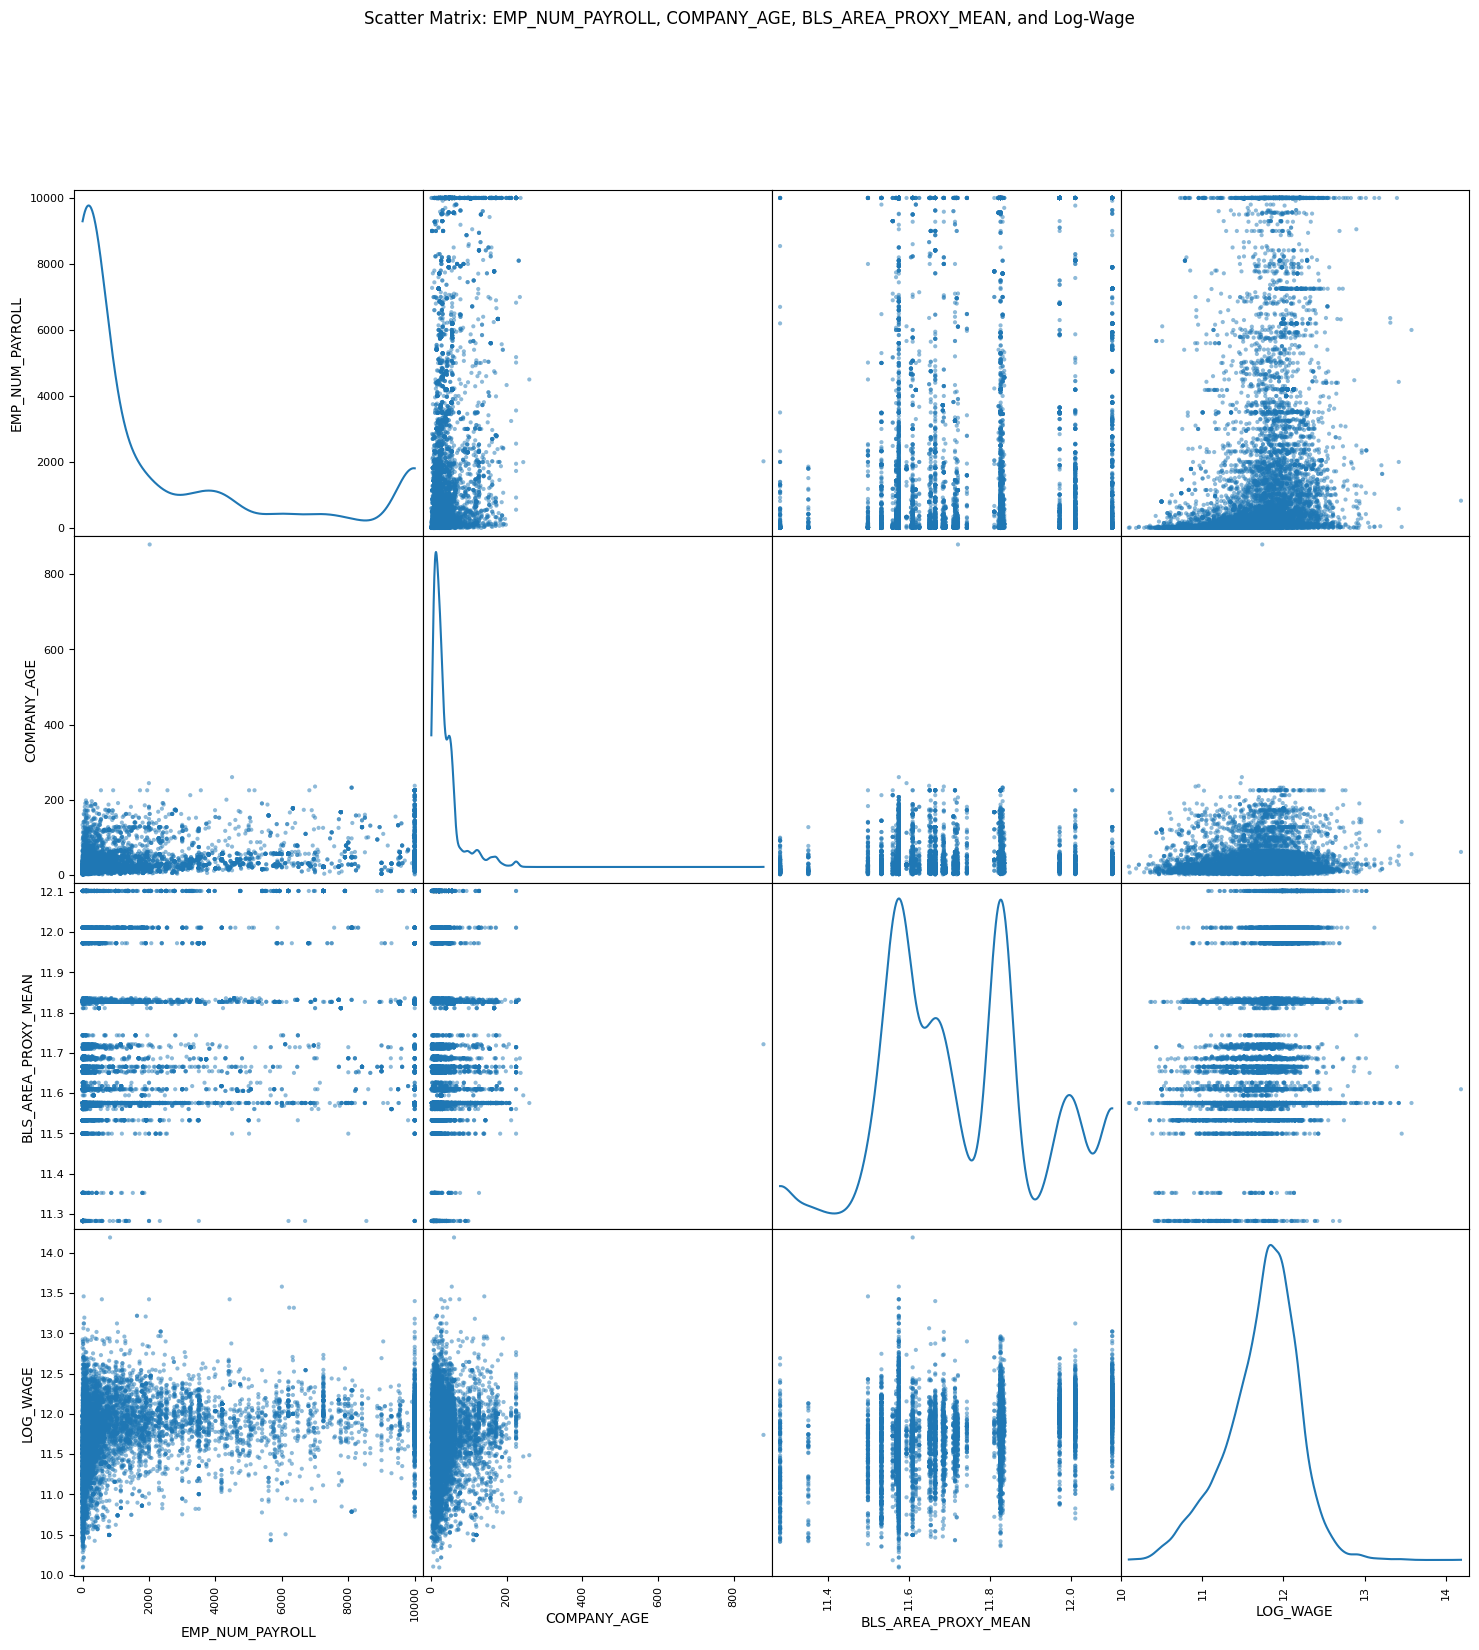

In [112]:
df_scatter = X_train[['EMP_NUM_PAYROLL', 'COMPANY_AGE', 'BLS_AREA_PROXY_MEAN']].copy()

# Cap the extreme outliers for plotting readability (as before)
df_scatter['EMP_NUM_PAYROLL'] = df_scatter['EMP_NUM_PAYROLL'].clip(upper=10000)
df_scatter['LOG_WAGE'] = y_train_log.values

# plot all four numerical variables
pd.plotting.scatter_matrix(df_scatter, figsize=(18, 18), diagonal='kde')
plt.suptitle('Scatter Matrix: EMP_NUM_PAYROLL, COMPANY_AGE, BLS_AREA_PROXY_MEAN, and Log-Wage')
plt.show()

## Creating Numerical Proxies for Categorical Features using Target Mean Encoding

To better utilize the information in the categorical columns `COMPANY_SIZE_CAT` and `COMPANY_AGE_CAT` within a linear regression model (or models that benefit from numerical inputs), we are creating numerical proxy features using **Target Mean Encoding**.

**Target Mean Encoding** works by replacing each category in a categorical feature with the mean of the target variable (in this case, the log-transformed wage) for that specific category.

*   **`SIZE_PROXY_MEAN`**: Each company size category ('Small', 'Mid', 'Large') is replaced with the average `LOG_WAGE` of companies belonging to that size category in the training data.
*   **`AGE_PROXY_MEAN`**: Each company age category ('Young', 'Established', 'Mature', 'Legacy') is replaced with the average `LOG_WAGE` of companies belonging to that age category in the training data.

**Why use Target Mean Encoding?**

*   It captures the relationship between the categorical feature and the target variable. Categories with higher average target values will have higher proxy values.
*   It reduces the dimensionality of high-cardinality categorical features (though in this case, the categories are low-cardinality, it's still a useful technique).
*   It can provide a single, meaningful numerical feature that can be directly used by various regression models.

**Important Note**: It is crucial to calculate the target means only on the **training data** and then use these calculated means to encode both the training and test sets. This prevents data leakage from the test set into the training process.

In [116]:
# --- 1. Combine X_train and y_train_log for easy calculation ---
# Create a temporary DataFrame for calculating means
train_df_temp = X_train.copy()
train_df_temp['LOG_WAGE'] = y_train_log

# --- 2. Create Proxy for COMPANY_SIZE_CAT ---

# Calculate the mean LOG_WAGE for each size category
size_means = train_df_temp.groupby('COMPANY_SIZE_CAT')['LOG_WAGE'].mean()

# Map the mean back to a new numerical column in X_train
X_train['SIZE_PROXY_MEAN'] = X_train['COMPANY_SIZE_CAT'].map(size_means)

# --- 3. Create Proxy for COMPANY_AGE_CAT ---

# Calculate the mean LOG_WAGE for each age category
age_means = train_df_temp.groupby('COMPANY_AGE_CAT')['LOG_WAGE'].mean()

# Map the mean back to a new numerical column in X_train
X_train['AGE_PROXY_MEAN'] = X_train['COMPANY_AGE_CAT'].map(age_means)

print("Two numerical proxy features created using Target Mean Encoding.")
print("New features in X_train: 'SIZE_PROXY_MEAN' and 'AGE_PROXY_MEAN'")
print(X_train[['COMPANY_SIZE_CAT', 'SIZE_PROXY_MEAN', 'COMPANY_AGE_CAT', 'AGE_PROXY_MEAN']].head())

Two numerical proxy features created using Target Mean Encoding.
New features in X_train: 'SIZE_PROXY_MEAN' and 'AGE_PROXY_MEAN'
      COMPANY_SIZE_CAT SIZE_PROXY_MEAN COMPANY_AGE_CAT AGE_PROXY_MEAN
2163             Large       11.919818     Established      11.731447
2334             Small       11.447969           Young      11.602453
6372               Mid       11.732831     Established      11.731447
7503             Small       11.447969           Young      11.602453
15190            Small       11.447969           Young      11.602453


/tmp/ipython-input-1469266997.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_means = train_df_temp.groupby('COMPANY_SIZE_CAT')['LOG_WAGE'].mean()
/tmp/ipython-input-1469266997.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = train_df_temp.groupby('COMPANY_AGE_CAT')['LOG_WAGE'].mean()


In [118]:
# 1. Select the proxy features to transform
proxy_features = ['BLS_AREA_PROXY_MEAN', 'SIZE_PROXY_MEAN', 'AGE_PROXY_MEAN']

# Ensure proxy features are numerical before applying transformations
for feature in proxy_features:
    if feature in X_train.columns:
        X_train[feature] = pd.to_numeric(X_train[feature], errors='coerce')

# We will apply one transformation to each feature for demonstration purposes:

# A. Logarithmic Transformation (on BLS Area Proxy)
# Add a small constant to avoid log(0) if necessary, though means are unlikely to be 0
X_train['BLS_PROXY_LOG'] = np.log(X_train['BLS_AREA_PROXY_MEAN'] + 1e-9)


# B. Squaring Transformation (on Size Proxy)
X_train['SIZE_PROXY_SQUARED'] = np.square(X_train['SIZE_PROXY_MEAN'])

# C. Exponential Transformation (on Age Proxy)
# We subtract the minimum value and divide by 100 to prevent overly large numbers
min_age_proxy = X_train['AGE_PROXY_MEAN'].min()
X_train['AGE_PROXY_EXP'] = np.exp((X_train['AGE_PROXY_MEAN'] - min_age_proxy) / 100)

print("Transformed proxy features created in X_train.")
print(X_train[['BLS_AREA_PROXY_MEAN', 'BLS_PROXY_LOG', 'SIZE_PROXY_MEAN', 'SIZE_PROXY_SQUARED', 'AGE_PROXY_MEAN', 'AGE_PROXY_EXP']].head())

Transformed proxy features created in X_train.
       BLS_AREA_PROXY_MEAN  BLS_PROXY_LOG  SIZE_PROXY_MEAN  \
2163             12.102002       2.493371        11.919818   
2334             11.654482       2.455691        11.447969   
6372             11.532787       2.445194        11.732831   
7503             11.532787       2.445194        11.447969   
15190            12.102002       2.493371        11.447969   

       SIZE_PROXY_SQUARED  AGE_PROXY_MEAN  AGE_PROXY_EXP  
2163           142.082069       11.731447       1.001291  
2334           131.055991       11.602453       1.000000  
6372           137.659330       11.731447       1.001291  
7503           131.055991       11.602453       1.000000  
15190          131.055991       11.602453       1.000000  


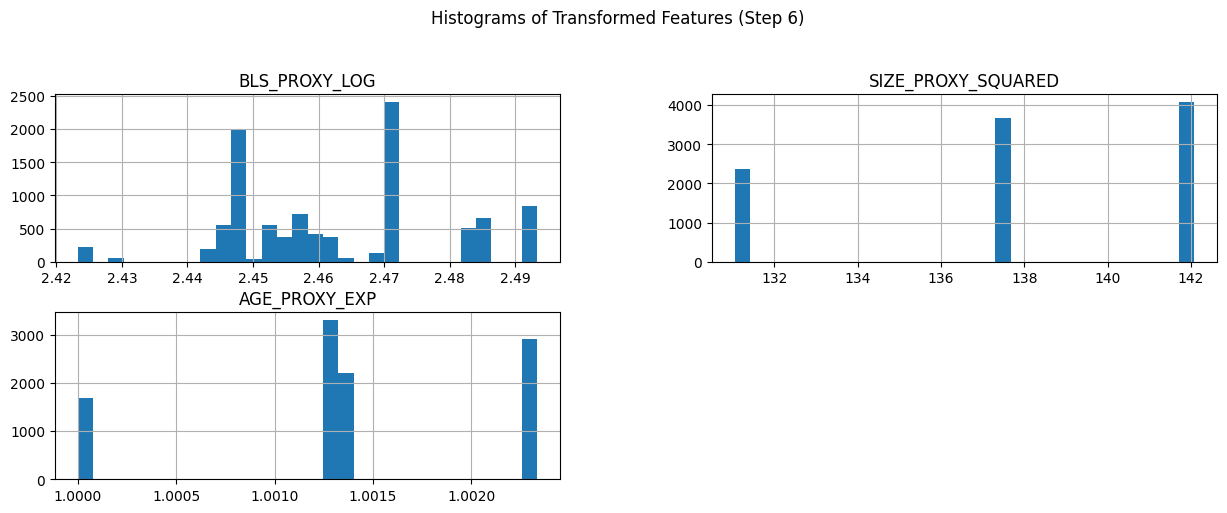

In [119]:
import matplotlib.pyplot as plt

transformed_features_to_plot = [
    'BLS_PROXY_LOG',
    'SIZE_PROXY_SQUARED',
    'AGE_PROXY_EXP'
]

# Plot Histograms of Transformed Features
X_train[transformed_features_to_plot].hist(bins=30, figsize=(15, 5))
plt.suptitle('Histograms of Transformed Features (Step 6)', y=1.05)
plt.show()

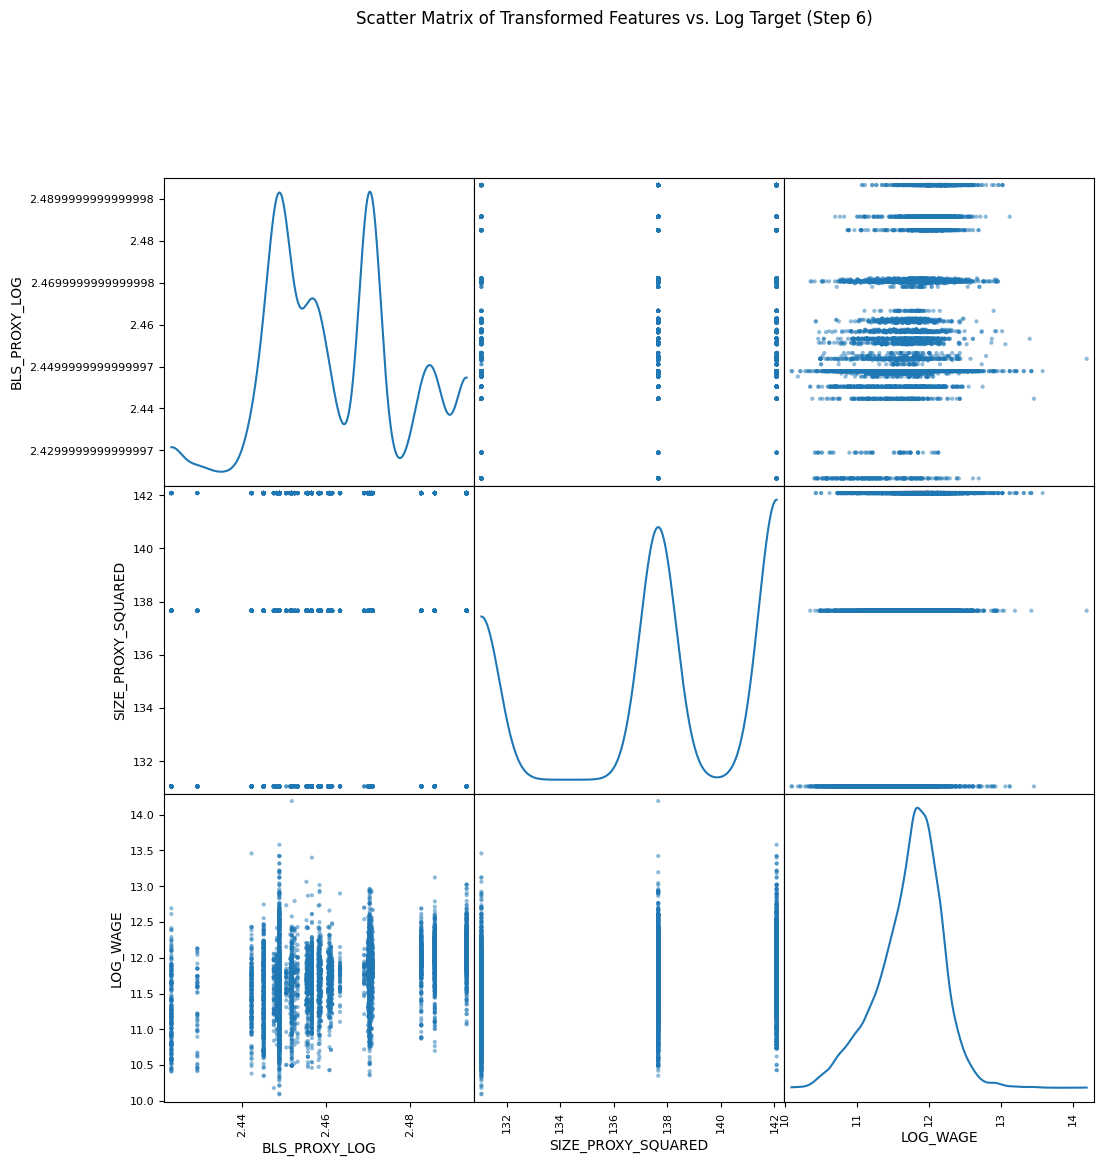

In [120]:
from pandas.plotting import scatter_matrix

# Combine the two best transformed features and the log target for the scatter matrix
final_scatter_df = X_train[['BLS_PROXY_LOG', 'SIZE_PROXY_SQUARED']].assign(LOG_WAGE=y_train_log)

pd.plotting.scatter_matrix(
    final_scatter_df,
    figsize=(12, 12),
    diagonal='kde'
)
plt.suptitle('Scatter Matrix of Transformed Features vs. Log Target (Step 6)', y=1.02)
plt.show()

In [127]:
# --- Features ---
feature_1 = 'EMP_NUM_PAYROLL'
feature_2 = 'COMPANY_AGE'

# --- 1. Transformations for EMP_NUM_PAYROLL ---

# Squaring: EMP_NUM_PAYROLL^2
X_train[f'{feature_1}_SQUARED'] = np.square(X_train[feature_1])

# Cubing: EMP_NUM_PAYROLL^3
X_train[f'{feature_1}_CUBED'] = np.power(X_train[feature_1], 3)

# Logarithmic: log(EMP_NUM_PAYROLL + 1)
# Adding 1 is standard practice to avoid log(0) errors (as payroll can be 0 or small)
X_train[f'{feature_1}_LOG'] = np.log(X_train[feature_1])

# Exponential: e^(EMP_NUM_PAYROLL / 1000)
# We divide by a large constant to prevent huge numbers
X_train[f'{feature_1}_EXP'] = np.exp(X_train[feature_1] / 1000)


# --- 2. Transformations for COMPANY_AGE ---

# Squaring: COMPANY_AGE^2
X_train[f'{feature_2}_SQUARED'] = np.square(X_train[feature_2])

# Cubing: COMPANY_AGE^3
X_train[f'{feature_2}_CUBED'] = np.power(X_train[feature_2], 3)

# Logarithmic: log(COMPANY_AGE)
X_train[f'{feature_2}_LOG'] = np.log(X_train[feature_2])

# Exponential: e^(COMPANY_AGE / 50)
# We divide by a moderate constant (50) based on the age range
X_train[f'{feature_2}_EXP'] = np.exp(X_train[feature_2] / 50)

print("All four required transformations applied to both features.")

All four required transformations applied to both features.


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


All four required transformations applied to both features.


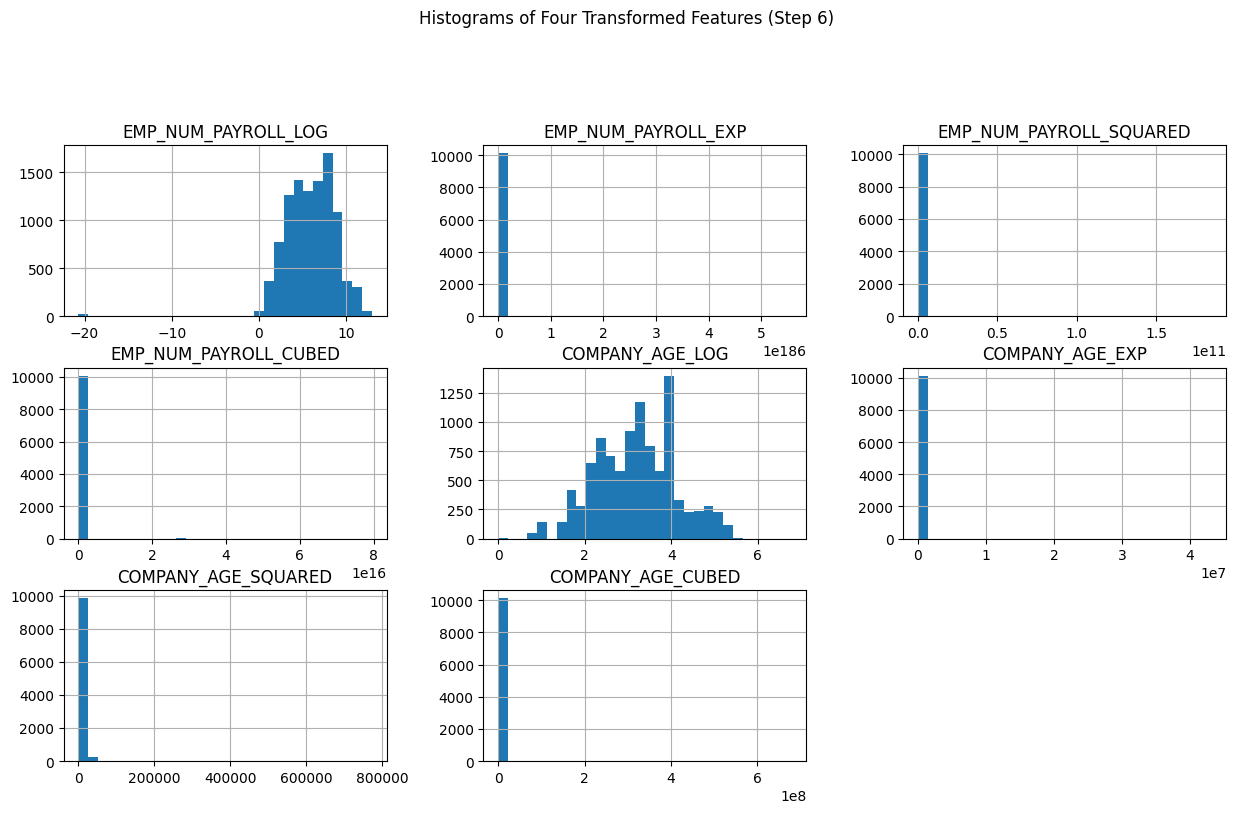

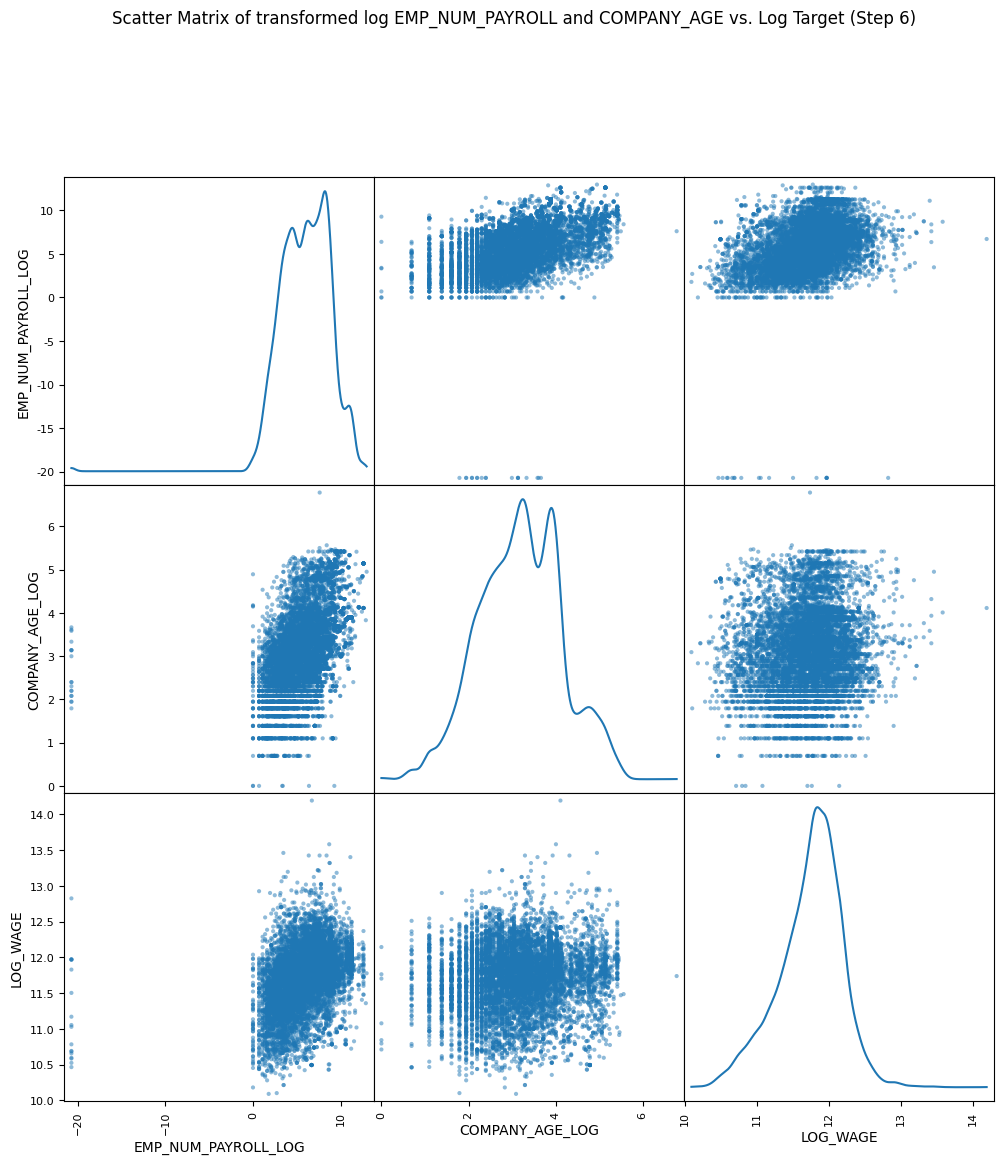

In [134]:
# Assuming X_train contains the original numerical columns: EMP_NUM_PAYROLL and COMPANY_AGE
# And y_train_log is your log-transformed target.

# --- 1. Select the two features for transformation ---
feature_1 = 'EMP_NUM_PAYROLL'
feature_2 = 'COMPANY_AGE'

# --- 2. Apply Required Transformations (Example: Log and Squaring) ---

# --- Feature 1: EMP_NUM_PAYROLL ---
# Apply Log transformation (Standard for skewed data)
# Add a small constant to handle zero or near-zero values
X_train[f'{feature_1}_LOG'] = np.log(X_train[feature_1] + 1e-9)

# Apply Cubing transformation (to demonstrate a high-order polynomial)
X_train[f'{feature_1}_CUBED'] = np.power(X_train[feature_1], 3)

# Apply Exponential transformation (to demonstrate extreme change)
# We divide by a large constant to prevent huge numbers, adjusting for the scale of payroll numbers
X_train[f'{feature_1}_EXP'] = np.exp(X_train[feature_1] / 1000)

# Apply Squaring transformation (to demonstrate a polynomial transformation)
X_train[f'{feature_1}_SQUARED'] = np.square(X_train[feature_1])


# --- Feature 2: COMPANY_AGE ---
# Apply Logarithmic: log(COMPANY_AGE)
# Add a small constant to handle zero or near-zero values if necessary (though age is likely > 0)
X_train[f'{feature_2}_LOG'] = np.log(X_train[feature_2] + 1e-9)


# Apply Squaring: COMPANY_AGE^2
X_train[f'{feature_2}_SQUARED'] = np.square(X_train[feature_2])

# Apply Cubing: COMPANY_AGE^3
X_train[f'{feature_2}_CUBED'] = np.power(X_train[feature_2], 3)

# Apply Exponential: e^(COMPANY_AGE / 50)
# We divide by a moderate constant (50) based on the age range
X_train[f'{feature_2}_EXP'] = np.exp(X_train[feature_2] / 50)

print("All four required transformations applied to both features.")


# --- 3. Plot Histograms of Resultant Data (Selection) ---

# Select two features and two transformations each for clear demonstration
transformed_features_to_plot = [
    f'{feature_1}_LOG',      # Payroll (Log)
    f'{feature_1}_EXP',
    f'{feature_1}_SQUARED',
    f'{feature_1}_CUBED', # Payroll (Exponential)
    f'{feature_2}_LOG',      # Payroll (Log)
    f'{feature_2}_EXP',
    f'{feature_2}_SQUARED',  # Age (Squared)
    f'{feature_2}_CUBED'     # Age (Cubed)
]

X_train[transformed_features_to_plot].hist(bins=30, figsize=(15, 8))
plt.suptitle('Histograms of Four Transformed Features (Step 6)', y=1.05)
plt.show()

# --- 4. Plot Scatter Matrix of Resultant Data ---
final_scatter_features = [
    f'{feature_1}_LOG',
    f'{feature_2}_LOG',
]

pd.plotting.scatter_matrix(
    X_train[final_scatter_features].assign(LOG_WAGE=y_train_log),
    figsize=(12, 12),
    diagonal='kde'
)
plt.suptitle('Scatter Matrix of transformed log EMP_NUM_PAYROLL and COMPANY_AGE vs. Log Target (Step 6)', y=1.02)
plt.show()

# One hot coding


In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Identify Categorical and Numerical Columns in X_train
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() # Likely empty now

# 2. Create the Preprocessing Pipeline
# We use ColumnTransformer to apply OneHotEncoder only to the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to all final categorical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        # Pass numerical features through without modification
        ('num', 'passthrough', numerical_features)
    ],
    remainder='drop' # Drop any columns not specified above
)

# 3. Fit and Transform the Training Data
# The encoder learns the unique categories *only* from the training set
X_train_processed = preprocessor.fit_transform(X_train)

# 4. Transform the Test Data (Crucial Step: Do NOT use .fit_transform())
# The test data uses the categories learned from the training set
X_test_processed = preprocessor.transform(X_test)

print(f"Final Processed Training Features shape: {X_train_processed.shape}")
print(f"Final Processed Testing Features shape: {X_test_processed.shape}")

Final Processed Training Features shape: (10128, 135)
Final Processed Testing Features shape: (2533, 135)
